In [212]:
def _csv(filena):
    data = []
    with open(filena, 'r') as file:
        csv_reader = reader(file)
        for k in csv_reader:
            if not k:
                continue
            data.append(k)
    return data
data=_csv('data1.csv')


In [213]:
print(len(data[0]))
print(len(data))

61
193


In [200]:
print(data[0])

['0.0453', '0.0523', '0.0843', '0.0689', '0.1183', '0.2583', '0.2156', '0.3481', '0.3337', '0.2872', '0.4918', '0.6552', '0.6919', '0.7797', '0.7464', '0.9444', '1', '0.8874', '0.8024', '0.7818', '0.5212', '0.4052', '0.3957', '0.3914', '0.325', '0.32', '0.3271', '0.2767', '0.4423', '0.2028', '0.3788', '0.2947', '0.1984', '0.2341', '0.1306', '0.4182', '0.3835', '0.1057', '0.184', '0.197', '0.1674', '0.0583', '0.1401', '0.1628', '0.0621', '0.0203', '0.053', '0.0742', '0.0409', '0.0061', '0.0125', '0.0084', '0.0089', '0.0048', '0.0094', '0.0191', '0.014', '0.0049', '0.0052', '0.0044', 'R']


In [201]:
def convert(data, col):
    for k in data:
        k[col] = float(k[col])

def strconvert(data, col):
    class_values = [row[col] for row in data]
    uniqu = set(class_values)
    l = {}
    for i, value in enumerate(uniqu):
        l[value] = i
    for row in data:
        row[col] = l[row[col]]
    return l


In [202]:
def split(data, k_folds):
    dataset_split = []
    dataset_cop = list(data)
    fold_size = int(len(data) / k_folds)
    for i in range(k_folds):
        fold = []
        while len(fold) < fold_size:
            index = randrange(0, len(dataset_cop))
            fold.append(dataset_cop.pop(index))
        dataset_split.append(fold)
    return dataset_split        

def accuracy_metric(act, predicted):
    correct = 0
    for i in range(len(act)):
        if act[i] == predicted[i]:
            correct += 1
    return correct / float(len(act)) * 100.0

In [203]:
def evaluate(data, algorithm, k_folds, *args):
    folds = split(data, k_folds)
    scores = []
    for fold in folds:
        train_se = list(folds)
        train_se.remove(fold) 
        train_se = sum(train_se, []) 
        test_se = list()
        for row in fold:
            row_cop = list(row)
            test_se.append(row_cop)
            row_cop[-1] = None
        predicted = algorithm(train_se, test_se, *args)
        actual = [row[-1] for row in fold]
        accur = accuracy_metric(actual, predicted)
        scores.append(accur)
    return scores

def predict(row, weights):
    activ = weights[0]
    for i in range(len(row)-1):
        activ += weights[i + 1] * row[i]
    return 1.0 if activ>= 0.0 else 0.0

In [204]:
def train_weights(train, l_rate, n_epoch):
    weights = [0.0 for i in range(len(train[0]))] 
    for epoch in range(n_epoch): 
        sum_ = 0.0
        for row in train: 
            prediction = predict(row, weights)
            error = row[-1] - prediction 
            sum_ += error**2 
            weights[0] = weights[0] + l_rate * error
            ans=weights
            l=l_rate
            e=error
            roww=row
            for i in range(len(roww)-1): 
                ans[i + 1] = ans[i + 1] + l * e * row[i]
            weights=ans
            l_rate=l
            error=e
        if sum_ == 0:
            weights_zero.append(weights)
    return weights
        
def perceptron(train, test, rate, epochs):
    predictions = []
    weight = train_weights(train, rate, epochs)    
    for row in test:
        p = predict(row, weight)
        predictions.append(p)
    return(predictions)

In [205]:

filename = 'data1.csv'
dataset = _csv(filename)
for i in range(len(dataset[0])-1):
    convert(dataset, i)
strconvert(dataset, len(dataset[0])-1)
divide = 2
rate = 0.02
epochs = 5000

weights_zero = list()
evaluate(dataset, perceptron, divide, rate, epochs)



w_test = weights_zero[0]
test=[]
final=[]
print('True value and Predicted Value')
for i in range(0, 193):
    print(dataset[i][60],predict(dataset[i], w_test))
    test.append(dataset[i][60])
    final.append(predict(dataset[i],w_test))


True value and Predicted Value
0 0.0
0 0.0
0 0.0
0 1.0
0 0.0
0 0.0
0 0.0
0 1.0
0 0.0
0 0.0
0 0.0
0 1.0
0 0.0
0 0.0
0 0.0
0 1.0
0 1.0
0 0.0
0 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 1.0
0 0.0
0 0.0
0 0.0
0 1.0
0 0.0
0 0.0
0 0.0
0 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 1.0
0 1.0
0 0.0
0 1.0
0 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 1.0
0 1.0
0 0.0
0 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 1.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
1 1.0
1 0.0
1 1.0
1 0.0
1 0.0
1 0.0
1 1.0
1 0.0
1 1.0
1 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 0.0
1 1.0
1 1.0
1 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 0.0
1 0.0
1 1.0
1 1.0
1 1

In [206]:
def gen_confusion(test, predict):
    conf = {'TruePos':0, 'TrueNeg':0, 'FalsPos':0, 'FalsNeg':0}
    for i in range(len(predict)):
        if test[i] == 1 and predict[i] == 1:
            conf['TruePos']+=1
        elif test[i] == 1 and predict[i] == 0:
            conf['FalsNeg']+=1
        elif test[i] == 0 and predict[i] == 1:
            conf['FalsPos']+=1
        else:
            conf['TrueNeg']+=1
    return confusion

In [207]:
def show_confusion(test, predict):
    data = {'Act Label': test, 'Pred Label': predict}
    df1 = pd.DataFrame(data, columns=data.keys())
    c_matrix = pd.crosstab(df1['Act Label'], df1['Pred Label'], rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(c_matrix, annot=True)

In [208]:
confusion = gen_confusion(test, final)
print(confusion)

{'TP': 82, 'TN': 78, 'FP': 18, 'FN': 15}


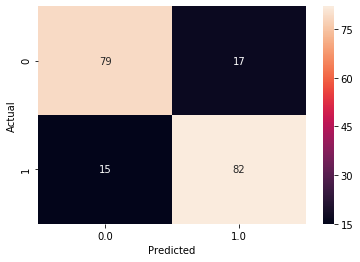

In [209]:
import seaborn as sns
show_confusion(test, final)

In [210]:
def cal_(confusion):
    a1 = (confusion['TP']+confusion['TN'])/sum(confusion.values())
    print('accuracy\n')
    print(a1)
    p1 = confusion['TP']/(confusion['TP']+confusion['FP'])
    print('precision\n')
    print(p1)
    r = confusion['TP']/(confusion['TP']+confusion['FN'])
    print('recall\n')
    print(r)
    f1 = 2*p1*r/(p1+r)
    print('f1')
    print(f1)
    
    

In [211]:
cal_(confusion)


accuracy

0.8290155440414507
precision

0.82
recall

0.845360824742268
f1
0.83248730964467
